## cleaning data process

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_continents = pd.read_csv("../data/happiness_analysis_data/continents.csv", delimiter= ";")
df_continents

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [3]:
df_continents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   continent  194 non-null    object
 1   country    194 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [4]:
df_daily_income = pd.read_csv("../data/happiness_analysis_data/average_daily_income.csv", delimiter=";")
df_daily_income

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,919.00,919.00,919.00,919.00,919.00,919.00,919.00,919.00,919.00,...,2.83,2.89,2.87,2.82,2.81,2.81,2.77,2.82,2.62,2.66
1,Angola,2.27,2.27,2.28,2.29,2.30,2.31,2.32,2.33,2.35,...,3.73,3.76,3.78,3.67,3.55,3.37,3.12,2.99,2.79,2.72
2,Albania,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,1.22,...,7.99,8.20,8.52,8.62,8.79,8.73,9.04,9.35,9.04,9.50
3,Andorra,1.48,1.49,1.49,1.49,1.49,1.50,1.50,1.50,1.51,...,52.00,54.20,55.70,57.70,59.70,61.70,63.80,66.00,68.30,70.60
4,United Arab Emirates,2.90,2.91,2.92,2.93,2.94,2.95,2.96,2.97,2.98,...,70.40,73.60,83.70,69.10,71.20,78.70,84.10,94.00,85.80,85.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,2.76,2.76,2.76,2.76,2.76,2.76,2.76,2.77,2.77,...,9.58,9.50,9.44,9.78,10.50,10.60,10.30,10.60,10.20,9.33
191,Yemen,1.22,1.23,1.23,1.23,1.24,1.24,1.24,1.25,1.25,...,4.23,4.35,4.18,2.93,2.59,2.40,2.36,2.36,2.18,2.14
192,South Africa,1.34,1.32,1.31,1.29,1.28,1.21,1.21,1.31,1.15,...,11.90,11.80,11.60,11.30,11.20,11.20,11.10,11.00,10.10,10.30
193,Zambia,1.26,1.26,1.27,1.27,1.27,1.27,1.28,1.28,1.28,...,2.78,2.85,2.88,2.91,2.93,2.94,2.97,2.93,2.74,2.68


In [5]:
df_daily_income_melted = df_daily_income.melt(id_vars= 'country', 
                var_name = 'year', 
                value_name= 'daily_income')
df_daily_income_melted.tail()

,country,year,daily_income
43285,Samoa,2021,9.33
43286,Yemen,2021,2.14
43287,South Africa,2021,10.30
43288,Zambia,2021,2.68
43289,Zimbabwe,2021,3.70


In [31]:
df_happiness_goverment_daily_income = df_happiness_goverment.merge(df_daily_income_melted, how="outer", on=["country","year"])
df_happiness_goverment_daily_income

,country,year,happiness_rate,goverment,daily_income
0,Afghanistan,2005,NaN,NaN,1.76
1,Angola,2005,NaN,NaN,4.00
2,Albania,2005,NaN,NaN,7.70
3,United Arab Emirates,2005,NaN,NaN,187.00
4,Argentina,2005,NaN,NaN,15.60
...,...,...,...,...,...
43285,Samoa,2021,NaN,NaN,9.33
43286,Yemen,2021,NaN,NaN,2.14
43287,South Africa,2021,NaN,NaN,10.30
43288,Zambia,2021,NaN,NaN,2.68


In [7]:
df_daily_income_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43290 entries, 0 to 43289
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       43290 non-null  object 
 1   year          43290 non-null  object 
 2   daily_income  43290 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1014.7+ KB


In [8]:
df_democracy = pd.read_csv("../data/happiness_analysis_data/democracy.csv")
df_democracy

,country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,30.6,30.4,30.2,27.5,24.8,24.8,24.8,24.8,27.7,27.7,25.5,25.5,29.7,28.5,28.5
1,Angola,24.1,28.8,33.5,33.4,33.2,33.2,33.5,33.5,33.5,33.5,34.0,36.2,36.2,37.2,36.6
2,Albania,59.1,59.1,59.1,58.9,58.6,58.1,56.7,56.7,56.7,59.1,59.1,59.8,59.8,58.9,60.8
3,United Arab Emirates,24.2,25.1,26.0,25.6,25.2,25.8,25.8,25.2,26.4,27.5,27.5,26.9,27.6,27.6,27.0
4,Argentina,66.3,66.3,66.3,67.3,68.4,68.4,68.4,68.4,68.4,70.2,69.6,69.6,70.2,70.2,69.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vietnam,27.5,26.4,25.3,27.4,29.4,29.6,28.9,32.9,34.1,35.3,33.8,30.8,30.8,30.8,29.4
163,Yemen,29.8,29.6,29.5,27.9,26.4,25.7,31.2,27.9,27.9,22.4,20.7,20.7,19.5,19.5,19.5
164,South Africa,79.1,79.1,79.1,78.5,77.9,77.9,77.9,79.0,78.2,75.6,74.1,72.4,72.4,72.4,70.5
165,Zambia,52.5,52.5,52.5,54.6,56.8,61.9,62.6,62.6,63.9,62.8,59.9,56.8,56.1,50.9,48.6


In [9]:
df_democracy_melted = df_democracy.melt(id_vars= 'country', 
                var_name = 'year', 
                value_name= 'democracy')
df_democracy_melted.tail()

,country,year,democracy
2500,Vietnam,2020,29.4
2501,Yemen,2020,19.5
2502,South Africa,2020,70.5
2503,Zambia,2020,48.6
2504,Zimbabwe,2020,31.6


In [32]:
df_happiness_goverment_daily_income_democracy = df_happiness_goverment_daily_income.merge(df_democracy_melted, how="outer", on=["country","year"])
df_happiness_goverment_daily_income_democracy

,country,year,happiness_rate,goverment,daily_income,democracy
0,Afghanistan,2005,NaN,NaN,1.76,NaN
1,Angola,2005,NaN,NaN,4.00,NaN
2,Albania,2005,NaN,NaN,7.70,NaN
3,United Arab Emirates,2005,NaN,NaN,187.00,NaN
4,Argentina,2005,NaN,NaN,15.60,NaN
...,...,...,...,...,...,...
43285,Samoa,2021,NaN,NaN,9.33,NaN
43286,Yemen,2021,NaN,NaN,2.14,NaN
43287,South Africa,2021,NaN,NaN,10.30,NaN
43288,Zambia,2021,NaN,NaN,2.68,NaN


In [10]:
df_goverment = pd.read_csv("../data/happiness_analysis_data/functioning_government.csv")
df_goverment

,country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,0.0,3.95,7.9,7.9,7.9,7.9,7.9,7.9,11.4,11.4,11.4,11.4,11.4,6.4,6.4
1,Angola,21.4,26.80,32.1,32.1,32.1,32.1,32.1,32.1,32.1,32.1,32.1,28.6,28.6,28.6,28.6
2,Albania,50.7,50.70,50.7,50.7,50.7,47.1,40.0,40.0,40.0,43.6,43.6,47.1,47.1,53.6,53.6
3,United Arab Emirates,30.7,35.00,39.3,37.5,35.7,35.7,35.7,35.7,35.7,35.7,35.7,35.7,39.3,39.3,39.3
4,Argentina,50.0,50.00,50.0,53.5,57.1,57.1,57.1,57.1,57.1,50.0,50.0,50.0,53.6,53.6,53.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vietnam,42.9,42.90,42.9,42.9,42.9,42.9,39.3,39.3,39.3,39.3,32.1,32.1,32.1,32.1,28.6
163,Yemen,27.1,26.10,25.0,21.4,17.9,3.6,14.3,14.3,14.3,3.6,0.0,0.0,0.0,0.0,0.0
164,South Africa,78.6,78.60,78.6,80.3,82.1,82.1,82.1,82.1,82.1,82.1,78.6,75.0,75.0,75.0,71.4
165,Zambia,46.4,46.40,46.4,50.0,53.6,50.0,53.6,53.6,53.6,53.6,53.6,50.0,46.4,29.3,29.3


In [12]:
df_goverment_melted = df_goverment.melt(id_vars= 'country', 
                var_name = 'year', 
                value_name= 'goverment')
df_goverment_melted.tail()

,country,year,goverment
2500,Vietnam,2020,28.6
2501,Yemen,2020,0.0
2502,South Africa,2020,71.4
2503,Zambia,2020,29.3
2504,Zimbabwe,2020,25.0


In [28]:
df_happiness_goverment = df_happiness_melted.merge(df_goverment_melted, how="outer", on=["country","year"])
df_happiness_goverment

,country,year,happiness_rate,goverment
0,Afghanistan,2005,NaN,NaN
1,Angola,2005,NaN,NaN
2,Albania,2005,NaN,NaN
3,United Arab Emirates,2005,NaN,NaN
4,Argentina,2005,NaN,NaN
...,...,...,...,...
2719,Vietnam,2020,NaN,28.6
2720,Yemen,2020,NaN,0.0
2721,South Africa,2020,NaN,71.4
2722,Zambia,2020,NaN,29.3


In [14]:
df_happiness = pd.read_csv("../data/happiness_analysis_data/happiness_score_whr.csv")
df_happiness

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,25.7
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,55.9,43.6,39.4,37.9,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,46.3,NaN,54.9,52.7,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,48.8
3,United Arab Emirates,NaN,67.3,NaN,NaN,68.7,71.0,71.2,72.2,66.2,65.4,65.7,68.3,70.4,66.0,67.9
4,Argentina,NaN,63.1,60.7,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,59.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Vietnam,NaN,52.9,54.2,54.8,53.0,53.0,57.7,55.3,50.2,50.8,50.8,50.6,51.8,53.0,53.5
159,Yemen,NaN,NaN,44.8,NaN,48.1,43.5,37.5,40.6,42.2,39.7,29.8,38.3,32.5,30.6,35.3
160,South Africa,NaN,50.8,52.0,53.5,52.2,46.5,49.3,51.3,36.6,48.3,48.9,47.7,45.1,48.8,48.1
161,Zambia,NaN,48.2,40.0,47.3,52.6,NaN,50.0,50.1,52.4,43.5,48.4,43.5,39.3,40.4,37.6


In [ ]:
## Melting the data

In [15]:
df_happiness_melted = df_happiness.melt(id_vars= 'country', 
                var_name = 'year', 
                value_name= 'happiness_rate')
df_happiness_melted.head()

,country,year,happiness_rate
0,Afghanistan,2005,NaN
1,Angola,2005,NaN
2,Albania,2005,NaN
3,United Arab Emirates,2005,NaN
4,Argentina,2005,NaN


In [16]:
df_income_inequality = pd.read_csv("../data/happiness_analysis_data/income-inequality.csv", delimiter=";")
df_income_inequality

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,37.7,37.7,37.7,37.7,37.7,37.7,37.7,37.7,38.3,39.0
1,Angola,57.7,57.7,57.7,57.7,57.7,57.7,57.7,57.7,57.7,...,46.0,46.8,47.7,48.5,49.4,50.3,51.3,51.3,52.1,53.0
2,Albania,39.9,39.9,39.9,39.9,39.9,39.9,39.9,39.9,39.9,...,29.0,31.6,34.6,32.9,33.7,33.2,33.2,33.2,33.8,34.5
3,Andorra,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,...,35.5,35.4,35.4,35.3,35.2,35.2,35.1,35.0,35.0,35.0
4,United Arab Emirates,39.8,39.8,39.8,39.8,39.8,39.8,39.8,39.7,39.7,...,32.6,32.5,31.1,29.7,28.4,27.2,26.0,26.0,26.0,26.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Samoa,40.7,40.7,40.7,40.7,40.7,40.7,40.7,40.7,40.7,...,39.4,38.7,38.7,38.7,38.7,38.7,38.7,38.7,38.7,38.7
193,Yemen,49.8,49.8,49.8,49.8,49.8,49.8,49.8,49.8,49.8,...,36.3,36.5,36.7,36.7,36.7,36.7,36.7,36.7,37.5,38.5
194,South Africa,35.2,35.2,35.2,35.2,35.2,35.2,35.2,35.2,35.2,...,63.2,63.1,63.0,62.7,63.0,63.3,63.3,63.3,64.0,64.9
195,Zambia,52.1,52.1,52.1,52.1,52.1,52.1,52.1,52.1,52.1,...,56.2,56.5,56.8,57.1,57.1,57.1,57.1,57.1,57.9,58.9


In [17]:
df_income_inequality_melted = df_income_inequality.melt(id_vars= 'country', 
                var_name = 'year', 
                value_name= 'income_inequality')
df_income_inequality_melted.head()

,country,year,income_inequality
0,Afghanistan,1800,30.5
1,Angola,1800,57.7
2,Albania,1800,39.9
3,Andorra,1800,42.5
4,United Arab Emirates,1800,39.8


In [33]:
df_happiness_goverment_daily_income_democracy_income_inequality = df_happiness_goverment_daily_income_democracy.merge(df_income_inequality_melted, how="outer", on=["country","year"])
df_happiness_goverment_daily_income_democracy_income_inequality

,country,year,happiness_rate,goverment,daily_income,democracy,income_inequality
0,Afghanistan,2005,NaN,NaN,1.76,NaN,37.7
1,Angola,2005,NaN,NaN,4.00,NaN,46.0
2,Albania,2005,NaN,NaN,7.70,NaN,30.6
3,United Arab Emirates,2005,NaN,NaN,187.00,NaN,32.0
4,Argentina,2005,NaN,NaN,15.60,NaN,47.7
...,...,...,...,...,...,...,...
43729,Liechtenstein,2019,NaN,NaN,NaN,NaN,40.0
43730,Holy See,2020,NaN,NaN,NaN,NaN,40.0
43731,Liechtenstein,2020,NaN,NaN,NaN,NaN,40.0
43732,Holy See,2021,NaN,NaN,NaN,NaN,40.0


In [18]:
df_population = pd.read_csv("../data/happiness_analysis_data/population_WB.csv")
df_population

,country,country code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0
262,"Yemen, Rep.",YEM,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,5816241.0,5907873.0,...,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
263,South Africa,ZAF,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,19888259.0,20406863.0,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0
264,Zambia,ZMB,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,3681953.0,3797877.0,...,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0


In [19]:
df_population_melted = df_population.melt(id_vars= ['country', "country code"], 
                var_name = 'year', 
                value_name= 'population')
df_population_melted.head()

,country,country code,year,population
0,Aruba,ABW,1960,54208.0
1,Africa Eastern and Southern,AFE,1960,130836765.0
2,Afghanistan,AFG,1960,8996967.0
3,Africa Western and Central,AFW,1960,96396419.0
4,Angola,AGO,1960,5454938.0


In [34]:
df_happiness_goverment_daily_income_democracy_income_inequality_population = df_happiness_goverment_daily_income_democracy_income_inequality.merge(df_population_melted, how="outer", on=["country","year"])
df_happiness_goverment_daily_income_democracy_income_inequality_population

,country,year,happiness_rate,goverment,daily_income,democracy,income_inequality,country code,population
0,Afghanistan,2005,NaN,NaN,1.76,NaN,37.7,AFG,2.565427e+07
1,Angola,2005,NaN,NaN,4.00,NaN,46.0,AGO,1.943360e+07
2,Albania,2005,NaN,NaN,7.70,NaN,30.6,ALB,3.011487e+06
3,United Arab Emirates,2005,NaN,NaN,187.00,NaN,32.0,ARE,4.588222e+06
4,Argentina,2005,NaN,NaN,15.60,NaN,47.7,ARG,3.889292e+07
...,...,...,...,...,...,...,...,...,...
48975,British Virgin Islands,2020,NaN,NaN,NaN,NaN,NaN,VGB,3.023700e+04
48976,Virgin Islands (U.S.),2020,NaN,NaN,NaN,NaN,NaN,VIR,1.062900e+05
48977,World,2020,NaN,NaN,NaN,NaN,NaN,WLD,7.763499e+09
48978,Kosovo,2020,NaN,NaN,NaN,NaN,NaN,XKX,1.790133e+06


In [20]:
df_women_in_parlament = pd.read_csv("../data/happiness_analysis_data/women_in_parliament.csv")
df_women_in_parlament

,country,1945,1946,1947,1948,1949,1950,1951,1952,1953,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.40,27.40,27.40,27.40,27.40,27.70,27.80,27.90,27.20,27.20
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.90,34.10,33.50,32.80,32.20,31.60,30.90,30.40,30.00,30.00
2,Albania,3.66,6.46,8.81,10.80,12.50,14.10,13.50,12.90,12.40,...,16.10,15.90,15.70,18.80,21.80,24.80,27.90,28.60,29.50,29.50
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.80,50.00,47.60,44.30,39.30,41.10,42.90,44.60,46.40,46.40
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.00,17.50,19.20,20.80,22.50,29.40,36.30,43.10,50.00,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.08,5.28,6.48,7.66,8.84,10.00,10.00,10.00,10.00,10.00
189,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.70,0.74,0.78,0.81,0.85,0.88,0.91,0.94,0.97,0.97
190,South Africa,NaN,NaN,NaN,1.31,1.43,1.54,1.66,1.77,1.89,...,42.10,41.70,41.20,40.80,41.30,41.90,42.80,43.90,45.30,45.40
191,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.00,12.50,13.50,14.30,14.90,15.40,15.90,16.70,18.00,16.80


In [21]:
df_women_in_parlament_melted = df_women_in_parlament.melt(id_vars= 'country', 
                var_name = 'year', 
                value_name= 'women_in_palament')
df_women_in_parlament_melted.head()

,country,year,women_in_palament
0,Afghanistan,1945,NaN
1,Angola,1945,NaN
2,Albania,1945,3.66
3,Andorra,1945,NaN
4,United Arab Emirates,1945,NaN


In [35]:
df_happiness_goverment_daily_income_democracy_income_inequality_population_women = df_happiness_goverment_daily_income_democracy_income_inequality_population.merge(df_women_in_parlament_melted, how="outer", on=["country","year"])
df_happiness_goverment_daily_income_democracy_income_inequality_population_women

,country,year,happiness_rate,goverment,daily_income,democracy,income_inequality,country code,population,women_in_palament
0,Afghanistan,2005,NaN,NaN,1.76,NaN,37.7,AFG,2.565427e+07,25.90
1,Angola,2005,NaN,NaN,4.00,NaN,46.0,AGO,1.943360e+07,32.10
2,Albania,2005,NaN,NaN,7.70,NaN,30.6,ALB,3.011487e+06,7.14
3,United Arab Emirates,2005,NaN,NaN,187.00,NaN,32.0,ARE,4.588222e+06,2.50
4,Argentina,2005,NaN,NaN,15.60,NaN,47.7,ARG,3.889292e+07,37.40
...,...,...,...,...,...,...,...,...,...,...
48975,British Virgin Islands,2020,NaN,NaN,NaN,NaN,NaN,VGB,3.023700e+04,NaN
48976,Virgin Islands (U.S.),2020,NaN,NaN,NaN,NaN,NaN,VIR,1.062900e+05,NaN
48977,World,2020,NaN,NaN,NaN,NaN,NaN,WLD,7.763499e+09,NaN
48978,Kosovo,2020,NaN,NaN,NaN,NaN,NaN,XKX,1.790133e+06,NaN


In [36]:
df_happiness_goverment_daily_income_democracy_income_inequality_population_women_continent = df_happiness_goverment_daily_income_democracy_income_inequality_population_women.merge(df_continents, how="outer", on="country")
df_total = df_happiness_goverment_daily_income_democracy_income_inequality_population_women_continent
df_total

,country,year,happiness_rate,goverment,daily_income,democracy,income_inequality,country code,population,women_in_palament,continent
0,Afghanistan,2005,NaN,NaN,1.76,NaN,37.7,AFG,25654274.0,25.9,Asia
1,Afghanistan,2006,NaN,0.00,1.80,30.6,37.7,AFG,26433058.0,26.3,Asia
2,Afghanistan,2007,NaN,3.95,1.99,30.4,37.7,AFG,27100542.0,26.6,Asia
3,Afghanistan,2008,37.2,7.90,2.02,30.2,37.7,AFG,27722281.0,26.9,Asia
4,Afghanistan,2009,44.0,7.90,2.40,27.5,37.7,AFG,28394806.0,27.3,Asia
...,...,...,...,...,...,...,...,...,...,...,...
48993,Vatican City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
48994,Saint Kitts and Nevis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
48995,Saint Lucia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
48996,Saint Vincent and the Grenadines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America


In [37]:
df_total['year'] = df_total['year'].astype(float)

In [38]:
df_total

,country,year,happiness_rate,goverment,daily_income,democracy,income_inequality,country code,population,women_in_palament,continent
0,Afghanistan,2005.0,NaN,NaN,1.76,NaN,37.7,AFG,25654274.0,25.9,Asia
1,Afghanistan,2006.0,NaN,0.00,1.80,30.6,37.7,AFG,26433058.0,26.3,Asia
2,Afghanistan,2007.0,NaN,3.95,1.99,30.4,37.7,AFG,27100542.0,26.6,Asia
3,Afghanistan,2008.0,37.2,7.90,2.02,30.2,37.7,AFG,27722281.0,26.9,Asia
4,Afghanistan,2009.0,44.0,7.90,2.40,27.5,37.7,AFG,28394806.0,27.3,Asia
...,...,...,...,...,...,...,...,...,...,...,...
48993,Vatican City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
48994,Saint Kitts and Nevis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
48995,Saint Lucia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America
48996,Saint Vincent and the Grenadines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North America


In [43]:
df_total_year = df_total[df_total["year"]>=2005]
df_total_year

,country,year,happiness_rate,goverment,daily_income,democracy,income_inequality,country code,population,women_in_palament,continent
0,Afghanistan,2005.0,NaN,NaN,1.76,NaN,37.7,AFG,25654274.0,25.9,Asia
1,Afghanistan,2006.0,NaN,0.00,1.80,30.6,37.7,AFG,26433058.0,26.3,Asia
2,Afghanistan,2007.0,NaN,3.95,1.99,30.4,37.7,AFG,27100542.0,26.6,Asia
3,Afghanistan,2008.0,37.2,7.90,2.02,30.2,37.7,AFG,27722281.0,26.9,Asia
4,Afghanistan,2009.0,44.0,7.90,2.40,27.5,37.7,AFG,28394806.0,27.3,Asia
...,...,...,...,...,...,...,...,...,...,...,...
48975,"Yemen, Rep.",2016.0,NaN,NaN,NaN,NaN,NaN,YEM,27168210.0,NaN,NaN
48976,"Yemen, Rep.",2017.0,NaN,NaN,NaN,NaN,NaN,YEM,27834811.0,NaN,NaN
48977,"Yemen, Rep.",2018.0,NaN,NaN,NaN,NaN,NaN,YEM,28498683.0,NaN,NaN
48978,"Yemen, Rep.",2019.0,NaN,NaN,NaN,NaN,NaN,YEM,29161922.0,NaN,NaN


In [62]:
df_total_year_2019 = df_total_year[df_total_year['year']==2019]
df_total_year_2019

,country,year,happiness_rate,goverment,daily_income,democracy,income_inequality,country code,population,women_in_palament,continent
14,Afghanistan,2019.0,25.7,6.4,2.82,28.5,37.7,AFG,3.804176e+07,27.2,Asia
236,Angola,2019.0,NaN,28.6,2.99,37.2,51.3,AGO,3.182530e+07,30.0,Africa
458,Albania,2019.0,48.8,53.6,9.35,58.9,33.2,ALB,2.854191e+06,29.5,Europe
680,United Arab Emirates,2019.0,67.9,39.3,94.00,27.6,26.0,ARE,9.770526e+06,50.0,Asia
902,Argentina,2019.0,59.7,53.6,18.70,70.2,42.9,ARG,4.493871e+07,39.9,South America
...,...,...,...,...,...,...,...,...,...,...,...
48734,British Virgin Islands,2019.0,NaN,NaN,NaN,NaN,NaN,VGB,3.003300e+04,NaN,NaN
48795,Virgin Islands (U.S.),2019.0,NaN,NaN,NaN,NaN,NaN,VIR,1.066690e+05,NaN,NaN
48856,World,2019.0,NaN,NaN,NaN,NaN,NaN,WLD,7.683438e+09,NaN,NaN
48917,Kosovo,2019.0,NaN,NaN,NaN,NaN,NaN,XKX,1.788878e+06,NaN,NaN


In [67]:
df_total_year

,country,year,happiness_rate,goverment,daily_income,democracy,income_inequality,country code,population,women_in_palament,continent
0,Afghanistan,2005.0,NaN,NaN,1.76,NaN,37.7,AFG,25654274.0,25.9,Asia
1,Afghanistan,2006.0,NaN,0.00,1.80,30.6,37.7,AFG,26433058.0,26.3,Asia
2,Afghanistan,2007.0,NaN,3.95,1.99,30.4,37.7,AFG,27100542.0,26.6,Asia
3,Afghanistan,2008.0,37.2,7.90,2.02,30.2,37.7,AFG,27722281.0,26.9,Asia
4,Afghanistan,2009.0,44.0,7.90,2.40,27.5,37.7,AFG,28394806.0,27.3,Asia
...,...,...,...,...,...,...,...,...,...,...,...
48975,"Yemen, Rep.",2016.0,NaN,NaN,NaN,NaN,NaN,YEM,27168210.0,NaN,NaN
48976,"Yemen, Rep.",2017.0,NaN,NaN,NaN,NaN,NaN,YEM,27834811.0,NaN,NaN
48977,"Yemen, Rep.",2018.0,NaN,NaN,NaN,NaN,NaN,YEM,28498683.0,NaN,NaN
48978,"Yemen, Rep.",2019.0,NaN,NaN,NaN,NaN,NaN,YEM,29161922.0,NaN,NaN


In [129]:
df_happiest_continent = df_total_year.groupby(['year','continent']).max('happiness_rate')
df_happiest_continent = df_happiest_continent.rename_axis(None, axis=1)
df_happiest_continent.reset_index(inplace=True)
df_happiest_continent_year = df_happiest_continent[df_happiest_continent['year']<2020.0]
df_happiest_continent_year

,year,continent,happiness_rate,goverment,daily_income,democracy,income_inequality,population,women_in_palament
0,2005.0,Africa,51.7,NaN,32.2,NaN,64.8,1.388650e+08,47.1
1,2005.0,Asia,70.8,NaN,187.0,NaN,47.0,1.303720e+09,31.5
2,2005.0,Australia and Oceania,73.4,NaN,46.8,NaN,46.1,2.039480e+07,32.2
3,2005.0,Europe,80.2,NaN,90.1,NaN,40.0,8.246942e+07,46.4
4,2005.0,North America,74.2,NaN,65.7,NaN,60.0,2.955166e+08,38.9
...,...,...,...,...,...,...,...,...,...
85,2019.0,Asia,71.3,82.1,94.0,79.9,44.7,1.407745e+09,50.0
86,2019.0,Australia and Oceania,73.0,92.9,61.7,92.6,41.4,2.536574e+07,40.8
87,2019.0,Europe,78.1,96.4,78.5,98.7,41.3,8.309296e+07,47.3
88,2019.0,North America,72.3,96.4,76.4,92.2,60.5,3.283300e+08,53.2


In [136]:
df_happiest_continent_year
fig = px.scatter(df_happiest_continent_year, x='year', y='happiness_rate',size='daily_income', color='continent',title='Happiness through years by continent')

fig.show()

In [109]:
df_total_year_europe_2006 = df_total_year[(df_total_year['continent']=='Europe') & (df_total_year['year']==2006)]
df_total_year_europe_2006

,country,year,happiness_rate,goverment,daily_income,democracy,income_inequality,country code,population,women_in_palament,continent
445,Albania,2006.0,NaN,50.7,7.85,59.1,30.4,ALB,2992547.0,9.46,Europe
1111,Armenia,2006.0,42.9,32.1,6.12,41.5,29.7,ARM,2958301.0,8.53,Europe
1555,Austria,2006.0,71.2,82.1,51.10,86.9,29.6,AUT,8268641.0,31.60,Europe
1777,Azerbaijan,2006.0,47.3,7.9,14.40,33.1,26.4,AZE,8484550.0,NaN,Europe
2221,Belgium,2006.0,NaN,82.1,46.40,81.5,28.1,BEL,10547958.0,35.10,Europe
3109,Bulgaria,2006.0,NaN,57.1,10.10,71.0,35.7,BGR,7601022.0,20.80,Europe
3553,Bosnia and Herzegovina,2006.0,NaN,32.9,20.20,57.8,33.4,BIH,3765422.0,14.30,Europe
3775,Belarus,2006.0,56.6,28.6,11.80,33.4,28.3,BLR,9604924.0,30.80,Europe
5551,Switzerland,2006.0,74.7,92.9,65.60,90.2,33.9,CHE,7483934.0,26.80,Europe
7993,Cyprus,2006.0,62.4,67.9,48.20,76.0,31.1,CYP,1045508.0,14.30,Europe


In [99]:
fig = px.choropleth(
        df_total_year,
        locations='country code',
        color='happiness_rate',
        projection='orthographic',
        scope = 'world',
        locationmode='ISO-3',
        color_continuous_scale=px.colors.sequential.RdBu)
fig.write_html('map.html', include_plotlyjs='cdn')
fig.show()

In [80]:
df_total_continent = df_total_year[df_total_year['year'] == 2005.0].value_counts(["continent"])
df_total_continent

continent            
Africa                   49
Europe                   44
Asia                     38
North America            20
Australia and Oceania    13
South America            12
dtype: int64

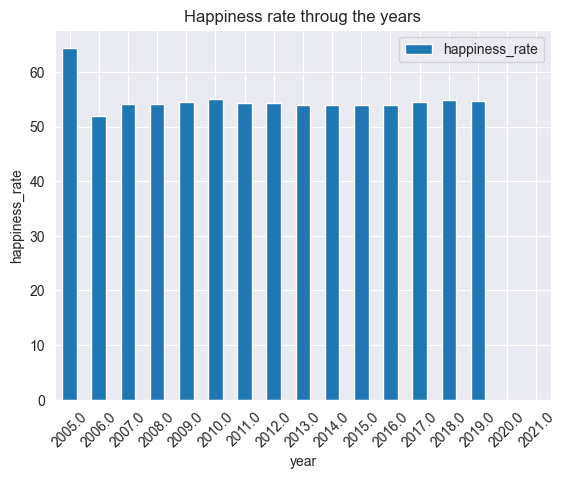

In [89]:
df_happiness_yearly = df_total_year.groupby('year').agg({'happiness_rate':'mean'})
df_happiness_yearly.plot(kind='bar', ylabel='happiness_rate')
plt.title('Happiness rate throug the years')
plt.xticks(rotation=45);

In [64]:
df_total_year_2019[df_total_year_2019['continent'] == "Australia and Oceania"]

,country,year,happiness_rate,goverment,daily_income,democracy,income_inequality,country code,population,women_in_palament,continent
1346,Australia,2019.0,72.2,89.3,61.70,90.9,34.4,AUS,25365745.0,36.60,Australia and Oceania
25100,New Zealand,2019.0,73.0,92.9,47.40,92.6,35.2,NZL,4979300.0,40.80,Australia and Oceania
36643,Fiji,2019.0,NaN,53.6,10.70,58.5,36.3,FJI,889955.0,19.60,Australia and Oceania
37309,Papua New Guinea,2019.0,NaN,60.7,4.22,60.3,41.4,PNG,8776119.0,0.00,Australia and Oceania
39957,Kiribati,2019.0,NaN,NaN,5.57,NaN,37.0,KIR,117608.0,6.52,Australia and Oceania
40845,Marshall Islands,2019.0,NaN,NaN,7.23,NaN,40.3,MHL,58791.0,6.06,Australia and Oceania
41067,Nauru,2019.0,NaN,NaN,9.71,NaN,34.1,NRU,10764.0,10.50,Australia and Oceania
41289,Palau,2019.0,NaN,NaN,16.50,NaN,37.4,PLW,18001.0,13.80,Australia and Oceania
41511,Solomon Islands,2019.0,NaN,NaN,3.86,NaN,36.5,SLB,669821.0,4.08,Australia and Oceania
42399,Tonga,2019.0,NaN,NaN,11.00,NaN,37.6,TON,104497.0,7.41,Australia and Oceania


In [41]:
import imageio.v2 as imageio 
import os

In [42]:
df_subset_2008 = df_total_year[(df_total_year["year"] == 2008)]
df_subset_2008

,country,year,happiness_rate,goverment,daily_income,democracy,income_inequality,country code,population,women_in_palament,continent
3,Afghanistan,2008.0,37.2,7.9,2.02,30.2,37.7,AFG,2.772228e+07,26.9,Asia
225,Angola,2008.0,NaN,32.1,3.92,33.5,42.7,AGO,2.169564e+07,37.3,Africa
447,Albania,2008.0,NaN,50.7,8.43,59.1,30.0,ALB,2.947314e+06,14.1,Europe
669,United Arab Emirates,2008.0,NaN,39.3,175.00,26.0,32.3,ARE,7.089486e+06,5.0,Asia
891,Argentina,2008.0,59.6,50.0,18.30,66.3,44.9,ARG,4.008016e+07,39.4,South America
...,...,...,...,...,...,...,...,...,...,...,...
48723,British Virgin Islands,2008.0,NaN,NaN,NaN,NaN,NaN,VGB,2.609600e+04,NaN,NaN
48784,Virgin Islands (U.S.),2008.0,NaN,NaN,NaN,NaN,NaN,VIR,1.083970e+05,NaN,NaN
48845,World,2008.0,NaN,NaN,NaN,NaN,NaN,WLD,6.757000e+09,NaN,NaN
48906,Kosovo,2008.0,NaN,NaN,NaN,NaN,NaN,XKX,1.747383e+06,NaN,NaN


In [ ]:
## LETS PLOT SOMETHING
### HAPPINESS_RATE VS GOVERMENT

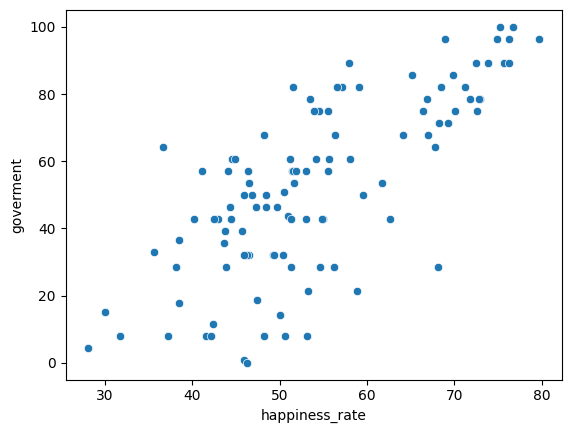

In [44]:
sns.scatterplot(x="happiness_rate", y="goverment", 
               data=df_subset_2008);

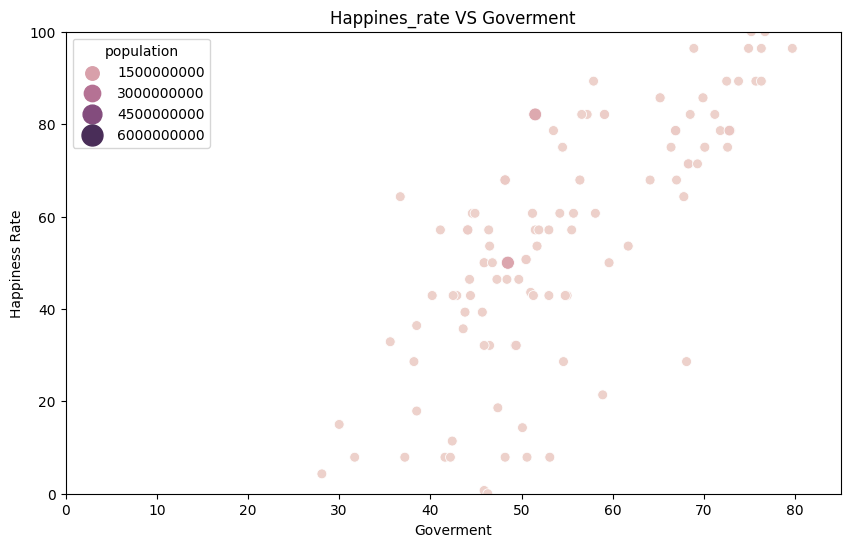

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="happiness_rate", y="goverment",
                 size='population', sizes=(50, 250),
               data=df_subset_2008, hue="population")
plt.axis([0, 85, 0, 100])
plt.title('Happines_rate VS Goverment')
plt.ylabel("Happiness Rate")
plt.xlabel('Goverment');

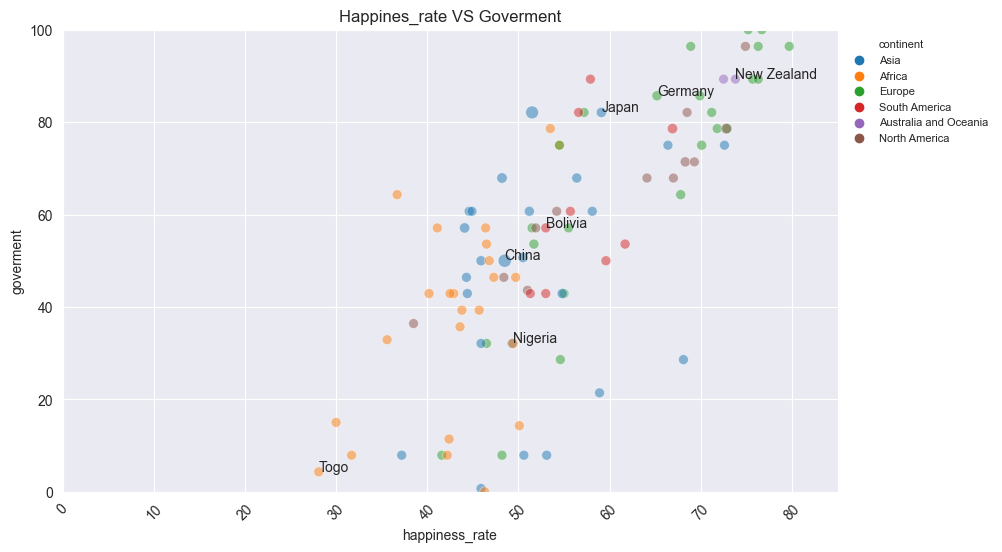

In [46]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid") 
ax = sns.scatterplot(x="happiness_rate", y="goverment",
                 size='population', sizes=(50, 250),alpha=0.5,
               data=df_subset_2008, hue="continent")
plt.axis([0, 85, 0, 100])
plt.title('Happines_rate VS Goverment') 
plt.annotate("Bolivia",(df_subset_2008[df_subset_2008["country"]=="Bolivia"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="Bolivia"]["goverment"]+0.20))
plt.annotate("Germany",(df_subset_2008[df_subset_2008["country"]=="Germany"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="Germany"]["goverment"]+0.20))
plt.annotate("Nigeria",(df_subset_2008[df_subset_2008["country"]=="Nigeria"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="Nigeria"]["goverment"]+0.20))
plt.annotate("New Zealand",(df_subset_2008[df_subset_2008["country"]=="New Zealand"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="New Zealand"]["goverment"]+0.20))
plt.annotate("Jamaica",(df_subset_2008[df_subset_2008["country"]=="Jamaica"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="Jamaica"]["goverment"]+0.20))
plt.annotate("Bulgaria",(df_subset_2008[df_subset_2008["country"]=="Bulgaria"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="Bulgaria"]["goverment"]))
plt.annotate("Japan",(df_subset_2008[df_subset_2008["country"]=="Japan"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="Japan"]["goverment"]+0.20))
plt.annotate("China",(df_subset_2008[df_subset_2008["country"]=="China"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="China"]["goverment"]+0.20))
plt.annotate("Togo",(df_subset_2008[df_subset_2008["country"]=="Togo"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="Togo"]["goverment"]+0.20))
h,l = ax.get_legend_handles_labels()
plt.legend(h[0:8],l[0:7],bbox_to_anchor=(1, 1), loc=2, frameon=False, fontsize=8)

plt.xticks(rotation=45);
plt.savefig("2008.png", bbox_inches="tight");
#plt.close()

In [48]:
graphs = []

for year in range(2006, 2021):
    df_subset_2008 = df_total_year[df_total_year["year"]==year]
    plt.figure(figsize=(10, 6))
    sns.set_style("darkgrid") 
    ax = sns.scatterplot(x="happiness_rate", y="goverment",
                 size='population', sizes=(50, 250),alpha=0.5,
               data=df_subset_2008, hue="continent")
    plt.axis([0, 85, 0, 100])
    plt.title(f'Happines rate VS Goverment {year}') 
    plt.annotate("Bolivia",(df_subset_2008[df_subset_2008["country"]=="Bolivia"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="Bolivia"]["goverment"]+0.20))
    plt.annotate("Germany",(df_subset_2008[df_subset_2008["country"]=="Germany"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="Germany"]["goverment"]+0.20))
    plt.annotate("Nigeria",(df_subset_2008[df_subset_2008["country"]=="Nigeria"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="Nigeria"]["goverment"]+0.20))
    plt.annotate("New Zealand",(df_subset_2008[df_subset_2008["country"]=="New Zealand"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="New Zealand"]["goverment"]+0.20))
    plt.annotate("Jamaica",(df_subset_2008[df_subset_2008["country"]=="Jamaica"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="Jamaica"]["goverment"]+0.20))
    plt.annotate("Bulgaria",(df_subset_2008[df_subset_2008["country"]=="Bulgaria"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="Bulgaria"]["goverment"]))
    plt.annotate("Japan",(df_subset_2008[df_subset_2008["country"]=="Japan"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="Japan"]["goverment"]+0.20))
    plt.annotate("China",(df_subset_2008[df_subset_2008["country"]=="China"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="China"]["goverment"]+0.20))
    plt.annotate("Togo",(df_subset_2008[df_subset_2008["country"]=="Togo"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="Togo"]["goverment"]+0.20))
    h,l = ax.get_legend_handles_labels()
    plt.legend(h[0:8],l[0:7],bbox_to_anchor=(1, 1), loc=2, frameon=False, fontsize=8)
    plt.xticks(rotation=45);
    plt.savefig(f"{year}.png");
    plt.close()

In [49]:
images = []

for year in range(2006, 2021):
    filename = f"{year}.png"
    img = imageio.imread(filename)
    images.append(img)

imageio.mimsave("test.gif", images, fps=1)

In [ ]:
### HAPPINESS_RATE VS WOMEN_IN_PARLAMENT

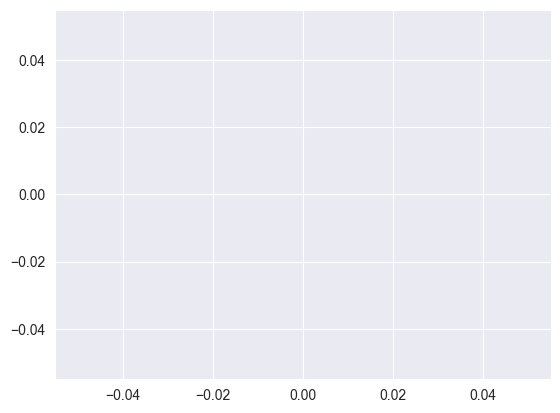

In [50]:
sns.scatterplot(x="happiness_rate", y="women_in_palament", 
               data=df_subset_2008);

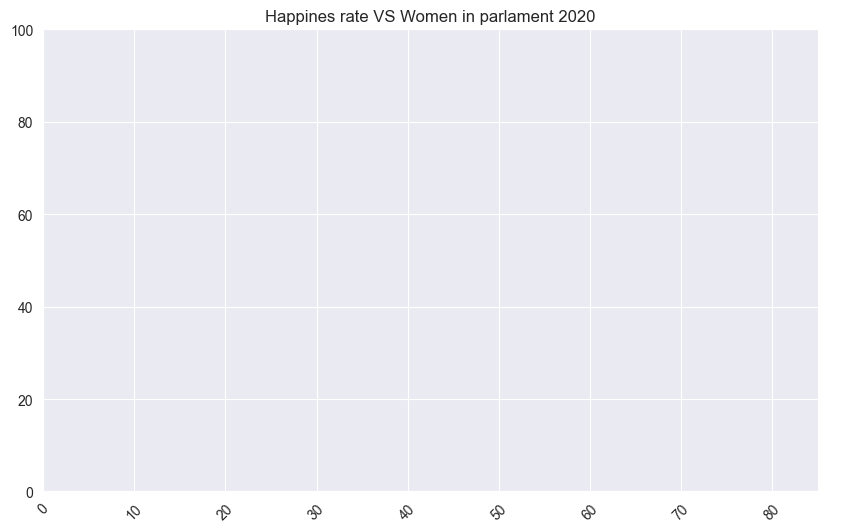

In [51]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid") 
ax = sns.scatterplot(x="happiness_rate", y="women_in_palament",
                 size='population', sizes=(50, 250),alpha=0.5,
               data=df_subset_2008, hue="continent")
plt.axis([0, 85, 0, 100])
plt.title(f'Happines rate VS Women in parlament {year}') 
plt.annotate("Bolivia",(df_subset_2008[df_subset_2008["country"]=="Bolivia"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="Bolivia"]["women_in_palament"]+0.20))
plt.annotate("Germany",(df_subset_2008[df_subset_2008["country"]=="Germany"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="Germany"]["women_in_palament"]+0.20))
plt.annotate("Nigeria",(df_subset_2008[df_subset_2008["country"]=="Nigeria"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="Nigeria"]["women_in_palament"]+0.20))
plt.annotate("New Zealand",(df_subset_2008[df_subset_2008["country"]=="New Zealand"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="New Zealand"]["women_in_palament"]+0.20))
plt.annotate("Jamaica",(df_subset_2008[df_subset_2008["country"]=="Jamaica"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="Jamaica"]["women_in_palament"]+0.20))
plt.annotate("Bulgaria",(df_subset_2008[df_subset_2008["country"]=="Bulgaria"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="Bulgaria"]["women_in_palament"]))
plt.annotate("Japan",(df_subset_2008[df_subset_2008["country"]=="Japan"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="Japan"]["women_in_palament"]+0.20))
plt.annotate("China",(df_subset_2008[df_subset_2008["country"]=="China"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="China"]["women_in_palament"]+0.20))
plt.annotate("Togo",(df_subset_2008[df_subset_2008["country"]=="Togo"]["happiness_rate"],
                     df_subset_2008[df_subset_2008["country"]=="Togo"]["women_in_palament"]+0.20))
h,l = ax.get_legend_handles_labels()
plt.legend(h[0:8],l[0:7],bbox_to_anchor=(1, 1), loc=2, frameon=False, fontsize=8)

plt.xticks(rotation=45);
plt.savefig("2008_women.png", bbox_inches="tight");
#plt.close()

In [52]:
correlation = df_total_year.corr()

C:\Users\emils\AppData\Local\Temp\ipykernel_43784\906648023.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_total_year.corr()


In [53]:
correlation

,year,happiness_rate,goverment,daily_income,democracy,income_inequality,population,women_in_palament
year,1.000000,-0.004189,-0.026750,-0.013475,-0.011362,-0.038347,0.019321,0.193815
happiness_rate,-0.004189,1.000000,0.663312,0.751137,0.610546,-0.232427,-0.052194,0.323747
goverment,-0.026750,0.663312,1.000000,0.308132,0.912633,-0.134433,0.078410,0.330693
daily_income,-0.013475,0.751137,0.308132,1.000000,0.285831,-0.203628,-0.028631,0.120947
democracy,-0.011362,0.610546,0.912633,0.285831,1.000000,-0.165971,-0.006740,0.322183
income_inequality,-0.038347,-0.232427,-0.134433,-0.203628,-0.165971,1.000000,-0.000874,-0.045022
population,0.019321,-0.052194,0.078410,-0.028631,-0.006740,-0.000874,1.000000,-0.041873
women_in_palament,0.193815,0.323747,0.330693,0.120947,0.322183,-0.045022,-0.041873,1.000000


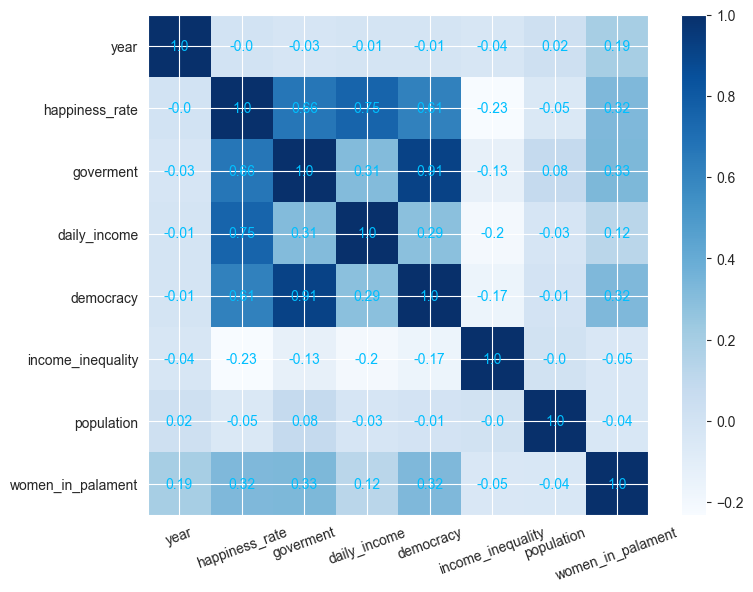

In [54]:

plt.figure(figsize = (8.5,6.5))

plt.imshow(correlation, cmap="Blues")

plt.xticks(range(len(correlation)),correlation.columns, rotation=20)
plt.yticks(range(len(correlation)),correlation.index)

for y, ylabel in zip(range(correlation.shape[0]), correlation.index):
    for x, xlabel in zip(range(correlation.shape[1]), correlation.columns):
        plt.text(x, y, round(correlation.loc[xlabel, ylabel], 2),
                 horizontalalignment='center',
                 verticalalignment='center',
                color='deepskyblue')
plt.colorbar();

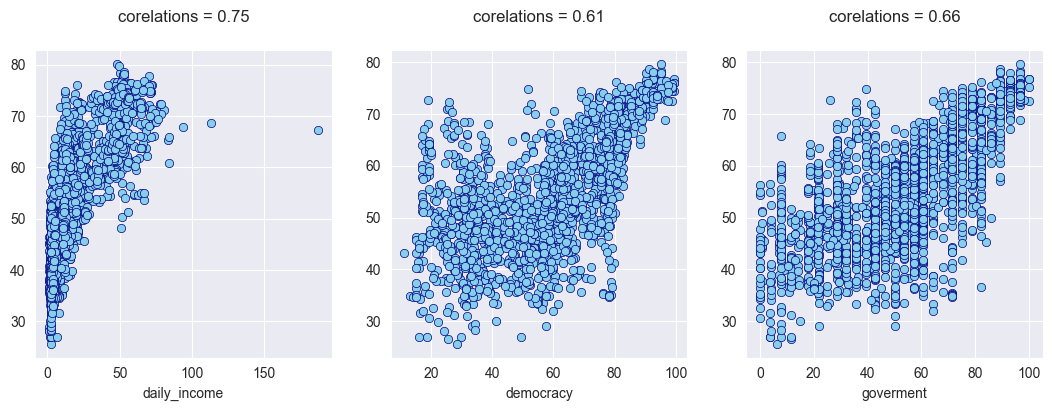

In [55]:
plt.figure(figsize=(13,4))

plt.subplot(1,3,2)
plt.scatter(df_total_year['democracy'], df_total_year['happiness_rate'], color="skyblue", edgecolor="navy", linewidth=.5)
plt.xlabel('democracy')
plt.title(f'corelations = {round(correlation.loc["happiness_rate", "democracy"], 2)}', pad=20);

plt.subplot(1,3,1)
plt.scatter(df_total_year['daily_income'], df_total_year['happiness_rate'], color="skyblue", edgecolor="navy", linewidth=.5)
plt.xlabel('daily_income')
plt.title(f'corelations = {round(correlation.loc["happiness_rate", "daily_income"], 2)}', pad=20);

plt.subplot(1,3,3)
plt.scatter(df_total_year['goverment'], df_total_year['happiness_rate'], color="skyblue", edgecolor="navy", linewidth=.5)
plt.xlabel('goverment')
plt.title(f'corelations = {round(correlation.loc["happiness_rate", "goverment"], 2)}', pad=20);